In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [34]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")


In [35]:
apps.head()
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [36]:
apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [37]:
apps.drop_duplicates(inplace=True)


In [38]:
apps.isnull().sum()


,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


In [39]:
apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)


/tmp/ipython-input-2676354049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)


In [40]:
apps['Installs'] = apps['Installs'].str.replace(',', '')
apps['Installs'] = apps['Installs'].str.replace('+', '')
apps['Installs'] = apps['Installs'].astype(int)


In [41]:
apps['Price'] = apps['Price'].str.replace('$', '')
apps['Price'] = apps['Price'].astype(float)


In [43]:
apps['Size'].unique()[:20]


array([19. , 14. ,  8.7, 25. ,  2.8,  5.6, 29. , 33. ,  3.1, 28. , 12. ,
       20. , 21. , 37. ,  2.7,  5.5, 17. , 39. , 31. ,  4.2])

In [44]:
def clean_size(size):
    if pd.isna(size):
        return np.nan
    if size == 'Varies with device':
        return np.nan
    size = size.replace(',', '')
    if 'M' in size:
        return float(size.replace('M', ''))
    if 'k' in size:
        return float(size.replace('k', '')) / 1024
    return np.nan


In [46]:
def clean_size(size):
    if pd.isna(size):
        return np.nan

    # If already numeric, return as-is
    if isinstance(size, (int, float)):
        return size

    size = str(size).replace(',', '')

    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan


In [47]:
apps['Size'] = apps['Size'].apply(clean_size)


In [48]:
apps['Size'].fillna(apps['Size'].median(), inplace=True)


/tmp/ipython-input-1982422215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Size'].fillna(apps['Size'].median(), inplace=True)


In [49]:
apps['Size'].dtype
apps['Size'].head()
apps.isnull().sum()


,0
Unnamed: 0,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0


In [51]:
apps['Installs'] = apps['Installs'].astype(str)


In [52]:
apps['Installs'] = apps['Installs'].str.replace(',', '', regex=False)
apps['Installs'] = apps['Installs'].str.replace('+', '', regex=False)
apps['Installs'] = apps['Installs'].str.replace('Free', '0', regex=False)

apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')
apps['Installs'].fillna(0, inplace=True)
apps['Installs'] = apps['Installs'].astype(int)


/tmp/ipython-input-2083245594.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Installs'].fillna(0, inplace=True)


In [53]:
apps['Installs'].dtype
apps['Installs'].head()


,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


In [54]:
apps['Price'] = apps['Price'].astype(str)
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')
apps['Price'].fillna(0, inplace=True)


/tmp/ipython-input-1494586932.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Price'].fillna(0, inplace=True)


In [55]:
apps['Price'].dtype


dtype('float64')

In [56]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')
apps['Reviews'].fillna(apps['Reviews'].median(), inplace=True)


/tmp/ipython-input-3365405582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Reviews'].fillna(apps['Reviews'].median(), inplace=True)


In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
apps['Category_Encoded'] = le.fit_transform(apps['Category'])


In [58]:
apps.describe()


,Unnamed: 0,Rating,Reviews,Size,Installs,Price,Category_Encoded
count,9659.000000,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000,9659.000000
mean,5666.172896,4.173243,2.165926e+05,19.328854,7.777507e+06,1.099299,16.760120
std,3102.362863,0.494312,1.831320e+06,20.584647,5.375828e+07,16.852152,8.400732
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,3111.500000,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000,11.000000
50%,5814.000000,4.200000,9.670000e+02,12.000000,1.000000e+05,0.000000,14.000000
75%,8327.500000,4.500000,2.940100e+04,25.000000,1.000000e+06,0.000000,25.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,32.000000


In [59]:
apps[['Rating', 'Reviews', 'Installs', 'Price']].corr()


,Rating,Reviews,Installs,Price
Rating,1.000000,0.055012,0.040068,-0.019534
Reviews,0.055012,1.000000,0.625165,-0.007598
Installs,0.040068,0.625165,1.000000,-0.009405
Price,-0.019534,-0.007598,-0.009405,1.000000


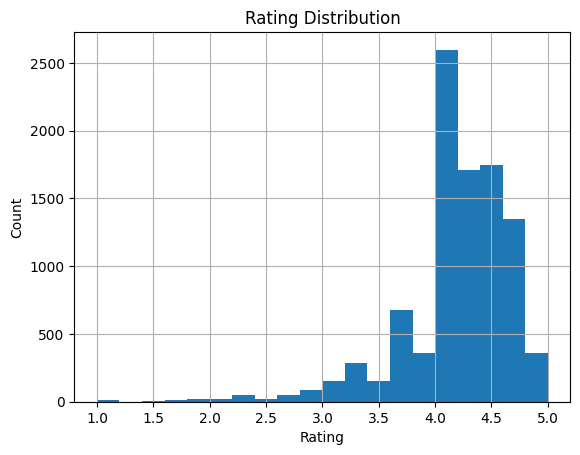

In [60]:
import matplotlib.pyplot as plt

apps['Rating'].hist(bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


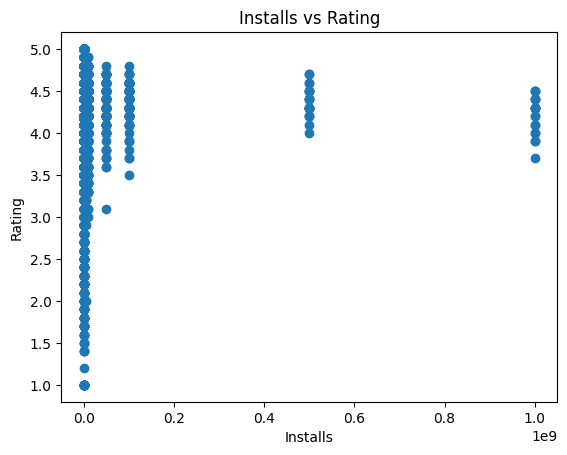

In [61]:
plt.scatter(apps['Installs'], apps['Rating'])
plt.title('Installs vs Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()
